In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl

import Census as Census
import tjy_udf as tjy
mpl.rc_file('tjy.mplstyle')

## Import Qualtrics CSV

In [2]:
gacen = Census.Census('C:/Users/takas/OneDrive/Desktop/2025 GA Financial Census_May 15, 2025_21.34.csv', datarange=(17,None))

Initialization completed.
Data recorded
	from column R: 
		"What division is your program in? - Selected Choice"
	to column BS: 
		"If you would like to provide more information on accessibility, please do so here."
362 responses.
54 questions asked.


## Background

In [3]:
bg = gacen.section((0,6), gacen.data_df)
bg.show_qlist()

Initialization completed.
Data recorded
	from column R: 
		"What division is your program in? - Selected Choice"
	to column W: 
		"What is your degree program?"
362 responses.
6 questions asked.
	1. What division is your program in? - Selected Choice
 	2. What division is your program in? - Other (please specify) - Text
 	3. Which department are you in? - Selected Choice
 	4. Which department are you in? - Other (please specify) - Text
 	5. Please specify which department you are in
 	6. What is your degree program?



In [4]:
to_pop = (bg.qlist[1], bg.qlist[3], bg.qlist[4])
for i in to_pop:
    bg.pop_other(i)
    
print('\nAfter processing:')
bg.show_qlist()

Popping Q2 (column S): 
	What division is your program in? - Other (please specify) - Text
	Responses: ['Quantitative bio sciences', 'Biophysics', 'QB3']
Popping Q4 (column U): 
	Which department are you in? - Other (please specify) - Text
	Responses: None
Popping Q5 (column V): 
	Please specify which department you are in
	Responses: None

After processing:
	1. What division is your program in? - Selected Choice
 	2. Which department are you in? - Selected Choice
 	3. What is your degree program?



In [7]:
# Division
data    = bg.count_single_choice(bg.qlist[0])
data_al = Census.alias_labels(data,
            als = {'School of Information': 'iSchool', 'College of Chemistry': 'Chemistry', 'School of Public Health': 'Public Health',
            'Letters and Science - Mathematical and Physical Sciences': 'L&S: Math and Phys. Sci.', 'School of Law': 'Law', 
            'Letters and Science - Arts and Humanities': 'L&S: Arts and Hum.', 'School of Optometry': 'Optometry', 'College of Engineering': 'Engineering',
            'College of Environmental Design': 'Environmental Design', 'School of Social Welfare': 'Social Welfare', 'Goldman School of Public Policy': 'Public Policy',
            'Letters and Science - Biological Sciences': 'L&S: Biol. Sci.', 'Berkeley School of Education': 'Education', 'Letters and Science - Social Sciences': 'L&S: Social Sci.',
            'Haas School of Business': 'Business', 'Rausser College of Natural Resources': 'Natural Resources', 'College of Computing, Data Science, and Society': 'Comput., Data Sci., and Soc.', 
            'Other (please specify)': 'Other'})
data_al = Census.move_to_bot(data_al, data_al.iloc[:,0]=='Other (please specify)')

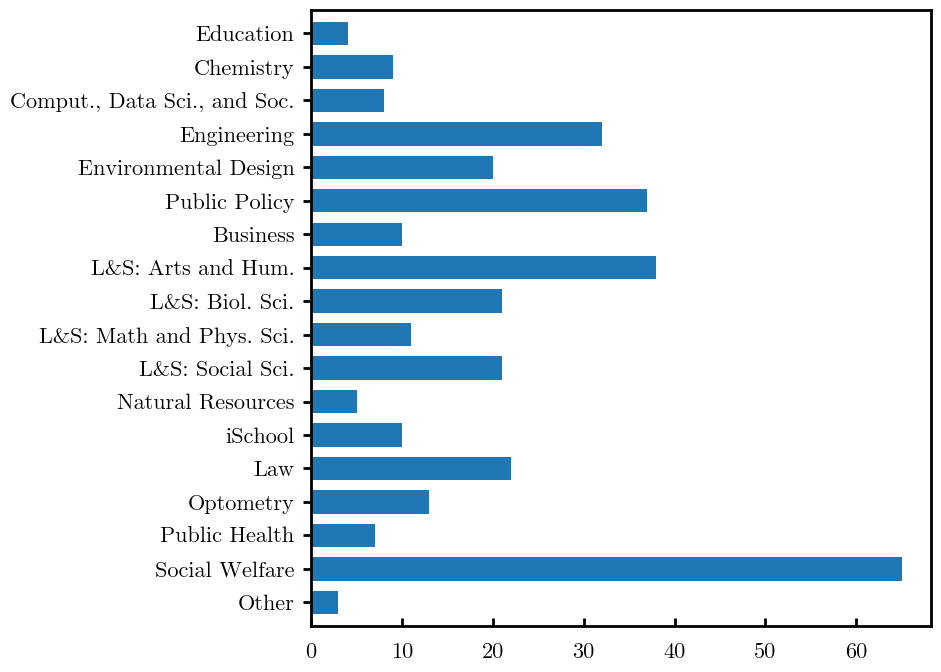

In [6]:
plt.figure(figsize=(8,8))
plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.7)
plt.margins(y=0.02)
tjy.ticks()

In [8]:
# Department
data    = bg.count_single_choice(bg.qlist[1])
data_al = Census.alias_labels(data,
            als = {'Chemical and Biomolecular Engineering': 'Chem. and Biomol. Eng.', 'Civil and Environmental Engineering': 'Civil and Environ. Eng.', 
             'Electrical Engineering & Computer Sciences': 'Elec. Eng. & Comp. Sci.', 'Environmental Science, Policy, and Management': 'Environ. Sci., Policy, and Manag.',
            'Industrial Engineering and Operations Research': 'Ind. Eng. and Op. Res.'})

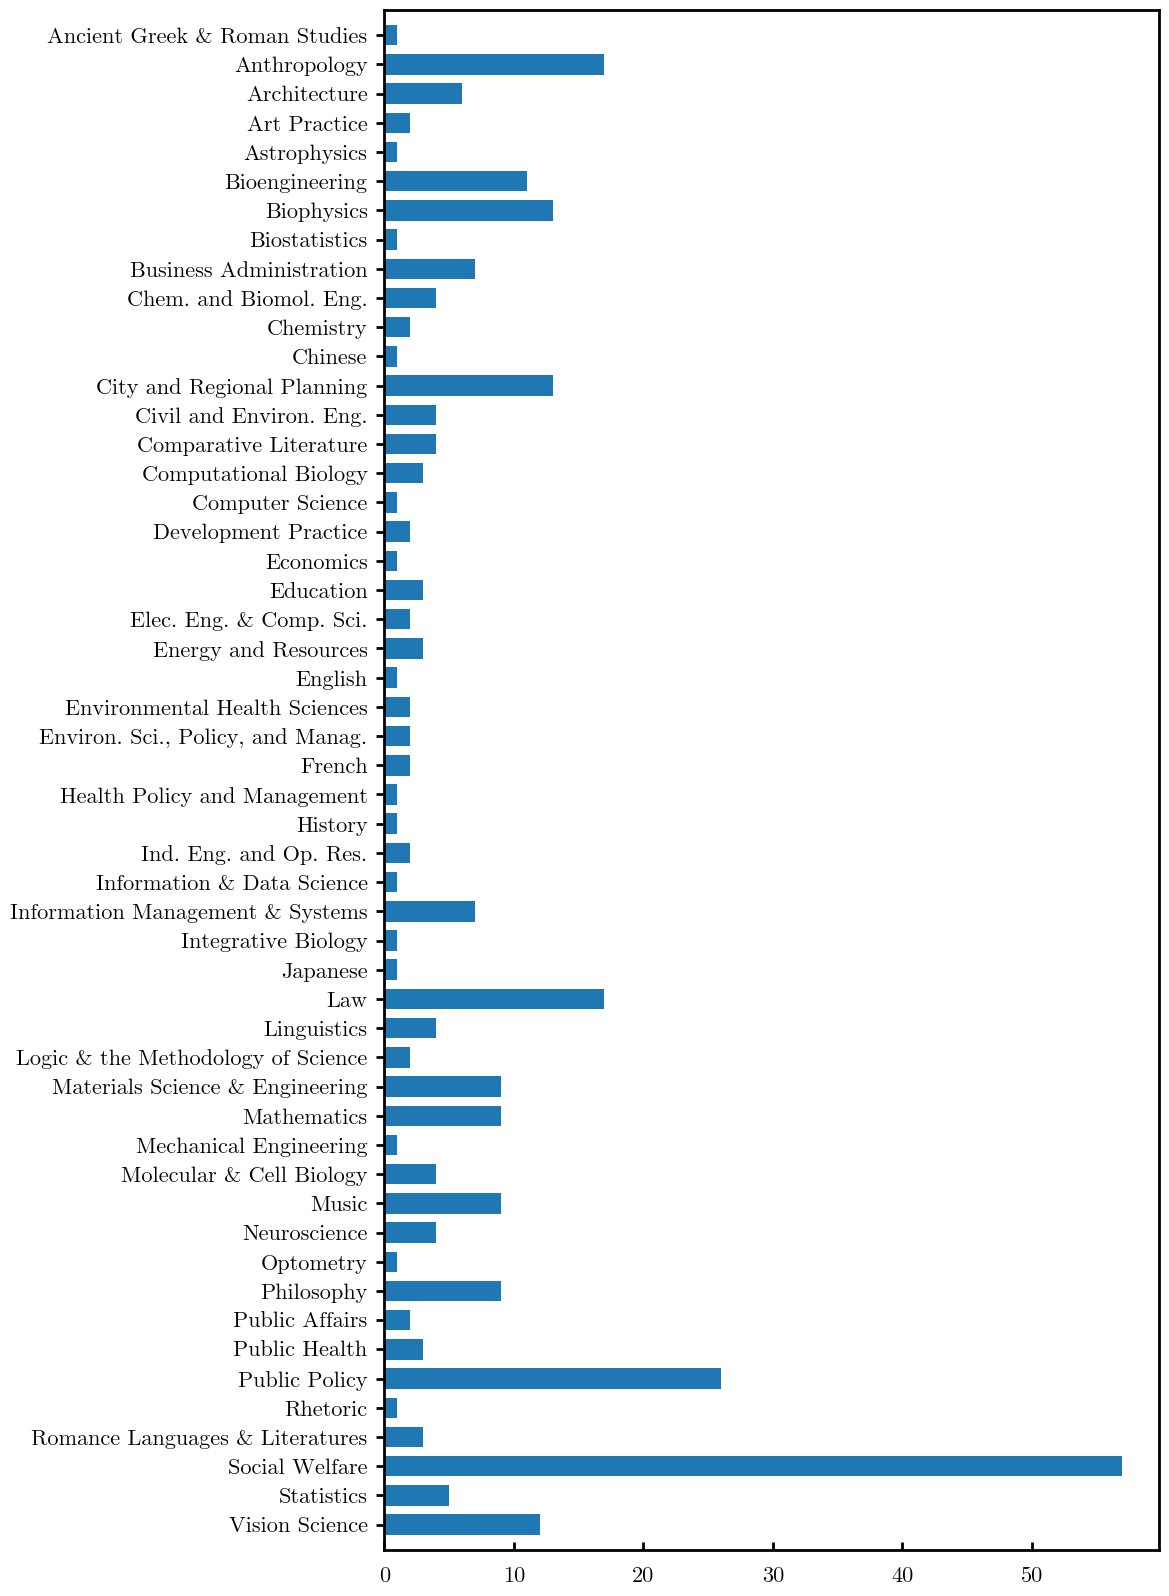

In [11]:
plt.figure(figsize=(10,20))
plt.barh(data_al.alias[::-1], data_al.counts[::-1], height=0.7, align='center')
plt.margins(y=0.01)
tjy.ticks()

In [ ]:
# Degree


In [240]:
# Degree
deg_data = df_bg[clabs[5]]
deg_list = deg_data[deg_data.notna()].unique()
deg_list.sort()
counts = [deg_data[deg_data==deg_list[i]].count() for i in range(len(deg_list))]
deg_names = {'Professional degree (JD, MPP, MPA, MBA, MPH, etc)': 'Prof.'}
labels = np.empty(len(deg_list),dtype=object)
for i in range(len(deg_list)):
    try: labels[i] = deg_names[deg_list[i]]
    except KeyError: labels[i] = deg_list[i]

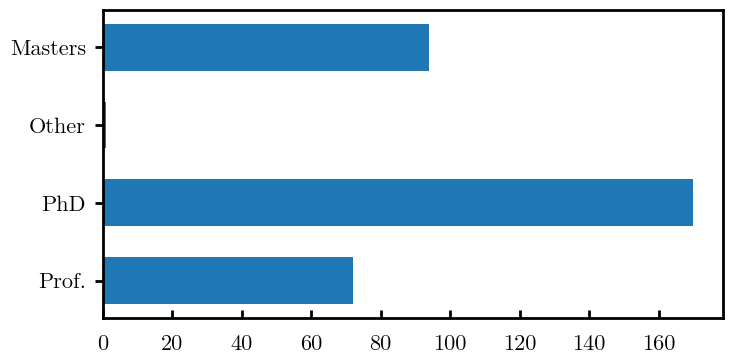

In [241]:
plt.figure(figsize=(8,4))
plt.barh(labels[::-1], counts[::-1], height=0.6, align='center')
plt.margins(y=0.05)
tjy.ticks()

## Financial + Basic Needs

In [250]:
df_fin = df1.iloc[:,6:36]
clabs = df_fin.columns.to_list()
print('Background data read into df_fin.\n{} questions in this section:'.format(df_fin.shape[1]))
print(*['\t{}. {}\n'.format(ind+1, i) for ind, i in enumerate(clabs)])

print_fil = lambda x: print('\t'+str([i for i in x[x.notna()]]))

div_other = df_fin.pop(clabs[1])
print('Other how do you fund your graduate studies (Q2):')
if div_other.count() > 0: 
    print_fil(div_other)
else: 
    print('\tNone')
print()

dpt_other = df_fin.pop(clabs[8])
print('Other factors in deciding whether to live in graduate student housing (Q9):')
if dpt_other.count() > 0:
    print_fil(dpt_other)
else: 
    print('\tNone')
print()

dpt_speci = df_fin.pop(clabs[20])
print('Other mode of transportation to campus (Q21):')
if dpt_speci.count() > 0:
    print_fil(dpt_speci)
else: 
    print('\tNone')
print()
    
dpt_speci = df_fin.pop(clabs[26])
print('Other significant areas of financial need (Q27):')
if dpt_speci.count() > 0:
    print_fil(dpt_speci)
else: 
    print('\tNone')
print()

Background data read into df_fin.
30 questions in this section:
	1. How do you fund your graduate studies? - Selected Choice
 	2. How do you fund your graduate studies? - Other (please specify) - Text
 	3. What is your annual income/stipend (pre-tax)?
 	4. What is your monthly rent?
 	5. Have you during your graduate studies had difficulty paying rent on time?
 	6. Have you during your graduate studies had difficulty securing housing?
 	7. Have you considered living in graduate student housing (Ida Jackson House, Intersection, Manville, xučyun ruwway, University Village)?
 	8. What were the most important factors in deciding whether to live in graduate student housing? - Selected Choice
 	9. What were the most important factors in deciding whether to live in graduate student housing? - Other (please specify) - Text
 	10. What percentage of your income/stipend do you use on basic needs?
 	11. Do you receive financial support from family or a partner?
 	12. On a scale from 1-10, how much

[' Other (please specify)' 'External scholarship'
 'External scholarship,GSI/Reader/Tutor'
 'External scholarship,GSI/Reader/Tutor, Other (please specify)'
 'External scholarship,GSI/Reader/Tutor,GSR' 'External scholarship,GSR'
 'External scholarship,Non-academic work,GSI/Reader/Tutor'
 'External scholarship,Non-academic work,GSR' 'GSI/Reader/Tutor'
 'GSI/Reader/Tutor, Other (please specify)' 'GSI/Reader/Tutor,GSR'
 'GSI/Reader/Tutor,GSR, Other (please specify)' 'GSR'
 'GSR, Other (please specify)' 'Non-academic work,GSI/Reader/Tutor'
 'Non-academic work,GSI/Reader/Tutor,GSR' 'Self-funded'
 'Self-funded, Other (please specify)' 'Self-funded,External scholarship'
 'Self-funded,External scholarship,GSI/Reader/Tutor, Other (please specify)'
 'Self-funded,External scholarship,Non-academic work,GSI/Reader/Tutor,GSR'
 'Self-funded,GSI/Reader/Tutor' 'Self-funded,GSI/Reader/Tutor,GSR'
 'Self-funded,GSR' 'Self-funded,GSR, Other (please specify)'
 'Self-funded,Non-academic work'
 'Self-funded,No

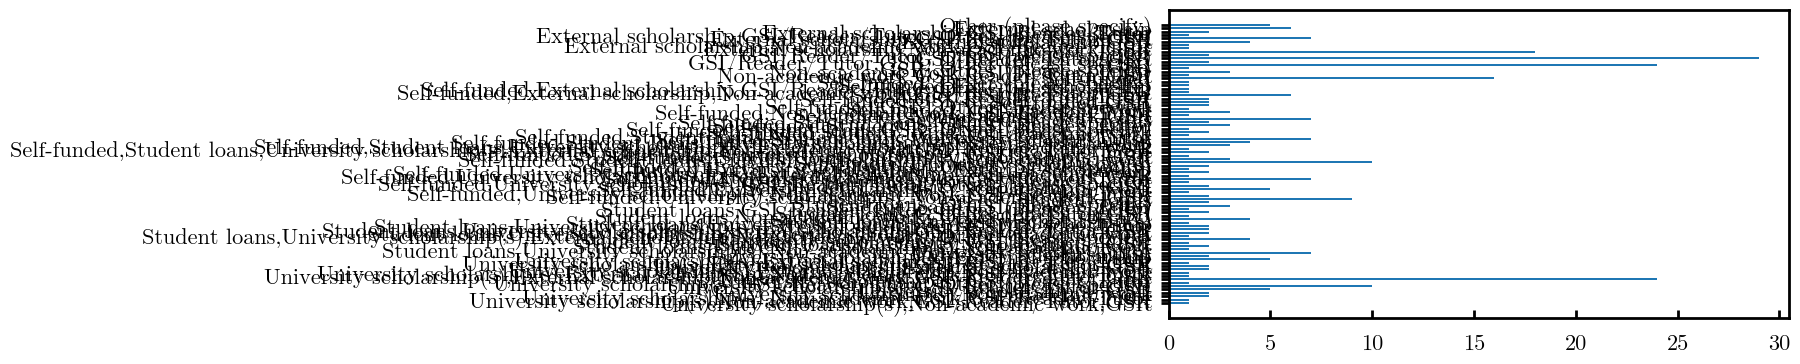

In [255]:
fund_data = df_bg[clabs[0]]
fund_list = ['Self-funded', 'Student loans', 'University scholarship(s)', 'External scholarship', 
fund_list.sort()
counts = [fund_data[fund_data==fund_list[i]].count() for i in range(len(fund_list))]
fund_names = {'Professional fundree (JD, MPP, MPA, MBA, MPH, etc)': 'Prof.'}
labels = np.empty(len(fund_list),dtype=object)
for i in range(len(fund_list)):
    try: labels[i] = fund_names[fund_list[i]]
    except KeyError: labels[i] = fund_list[i]
    
plt.figure(figsize=(8,4))
plt.barh(labels[::-1], counts[::-1], height=0.6, align='center')
plt.margins(y=0.05)
tjy.ticks()